/var/folders/jp/bd398j317bgfry9k1hrttp6h0000gn/T/ipykernel_61682/1310044486.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
/var/folders/jp/bd398j317bgfry9k1hrttp6h0000gn/T/ipykernel_61682/1310044486.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i + 1].legend()


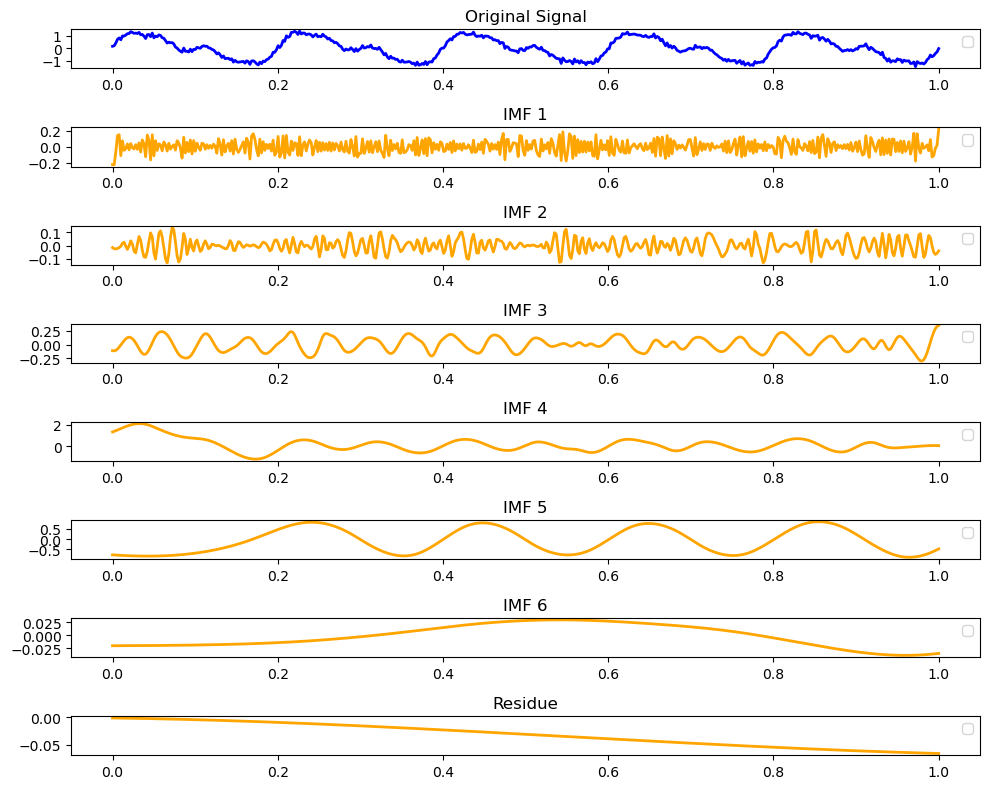

In [4]:
#!pip install EMD-signal
# you might have to do this.
import numpy as np
import matplotlib.pyplot as plt
from PyEMD.EMD import EMD


# Generate a sample signal
def generate_sample_signal(t):
    # A signal with multiple frequency components
    signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 10 * t) + 0.2 * np.sin(2 * np.pi * 20 * t)
    return signal

# Time vector
t = np.linspace(0, 1, 500)

# Generate the signal
np.random.seed(0)
signal = generate_sample_signal(t)

# Generate noise
noise = np.random.normal(0, 0.1, 500)

#Add noise to signal
signal = signal + noise

# Perform Empirical Mode Decomposition (EMD)
emd = EMD()
IMFs = emd(signal)
fig, axes = plt.subplots(len(IMFs) + 1, 1, figsize=(10, 8), facecolor='none')

# Set transparent background for all subplots
for ax in axes:
    ax.set_facecolor('none')  # Make subplot backgrounds transparent

# Plot the original signal
axes[0].plot(t, signal,  color='blue', linewidth=2)
axes[0].legend()
axes[0].set_title('Original Signal')

# Plot each IMF
for i, imf in enumerate(IMFs):
    if i < len(IMFs)-1:
        title = f"IMF {i+1}"
    elif i == len(IMFs)-1:
        title = "Residue"
    axes[i + 1].plot(t, imf,  color='orange', linewidth=2)
    axes[i + 1].legend()
    axes[i+1].set_title(title)

plt.tight_layout()

# Save the plot with a fully transparent background
plt.savefig('EMD_plot.png', transparent=True, bbox_inches='tight', dpi=300)

# Show the plot
plt.show()